In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab.patches import cv2_imshow
from imutils import paths
import face_recognition
import glob
import cv2
import os

In [ ]:
# UPLOAD the images here to test

from google.colab import files
upload = files.upload()

Saving 00000000.jpg to 00000000 (1).jpg
Saving 00000001.jpg to 00000001 (1).jpg
Saving 00000002.jpg to 00000002 (1).jpg
Saving 00000003.jpg to 00000003 (1).jpg
Saving 00000004.jpg to 00000004 (1).jpg
Saving 00000005.jpg to 00000005 (1).jpg
Saving 00000006.jpg to 00000006 (1).jpg
Saving 00000007.jpg to 00000007 (1).jpg
Saving 00000008.jpg to 00000008 (1).jpg
Saving 00000009.jpg to 00000009 (1).jpg
Saving 00000010.jpg to 00000010 (1).jpg
Saving 00000011.jpg to 00000011 (1).jpg
Saving 00000012.jpg to 00000012 (1).jpg
Saving 00000013.jpg to 00000013 (1).jpg
Saving 00000014.jpg to 00000014 (1).jpg
Saving 00000015.jpg to 00000015 (1).jpg
Saving 00000016.jpg to 00000016 (1).jpg
Saving 00000017.jpg to 00000017 (1).jpg
Saving 00000018.jpg to 00000018 (1).jpg
Saving 00000019.jpg to 00000019 (1).jpg
Saving 00000020.jpg to 00000020 (1).jpg
Saving 00000021.jpg to 00000021 (1).jpg
Saving 00000022.jpg to 00000022 (1).jpg
Saving 00000023.jpg to 00000023 (1).jpg
Saving 00000024.jpg to 00000024 (1).jpg


In [ ]:
data = []

for file in upload:
  print("[INFO] processing image {}".format(file))
  image = cv2.imread(file)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb, model = "cnn")
  encodings = face_recognition.face_encodings(rgb, boxes)
  d = [{"imagePath": file, "loc": box, "encoding": enc} for (box, enc) in zip(boxes, encodings)]
  data.extend(d)

  #cv2_imshow(image)
  #cv2_imshow(rgb)
  #print(boxes)
  #print(encodings)

[INFO] processing image 00000000.jpg
[INFO] processing image 00000001.jpg
[INFO] processing image 00000002.jpg
[INFO] processing image 00000003.jpg
[INFO] processing image 00000004.jpg
[INFO] processing image 00000005.jpg
[INFO] processing image 00000006.jpg
[INFO] processing image 00000007.jpg
[INFO] processing image 00000008.jpg
[INFO] processing image 00000009.jpg
[INFO] processing image 00000010.jpg
[INFO] processing image 00000011.jpg
[INFO] processing image 00000012.jpg
[INFO] processing image 00000013.jpg
[INFO] processing image 00000014.jpg
[INFO] processing image 00000015.jpg
[INFO] processing image 00000016.jpg
[INFO] processing image 00000017.jpg
[INFO] processing image 00000018.jpg
[INFO] processing image 00000019.jpg
[INFO] processing image 00000020.jpg
[INFO] processing image 00000021.jpg
[INFO] processing image 00000022.jpg
[INFO] processing image 00000023.jpg
[INFO] processing image 00000024.jpg
[INFO] processing image 00000025.jpg
[INFO] processing image 00000026.jpg
[

In [ ]:
from google.colab.patches import cv2_imshow
from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np

In [ ]:
# converting the data into a numpy array
np_data = np.array(data)
np_encodings = [item["encoding"] for item in np_data]

In [ ]:
cluster = DBSCAN(metric = "euclidean", n_jobs = -1)
cluster.fit(np_encodings)

DBSCAN(n_jobs=-1)

In [ ]:
labelIDs = np.unique(cluster.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] No. of unique faces: {}".format(numUniqueFaces))
print("[INFO] Label IDs: {}, where [-1] refers to unidentified faces or outliers".format(labelIDs))

[INFO] No. of unique faces: 5
[INFO] Label IDs: [-1  0  1  2  3  4], where [-1] refers to unidentified faces or outliers


[INFO] faces for face ID: -1


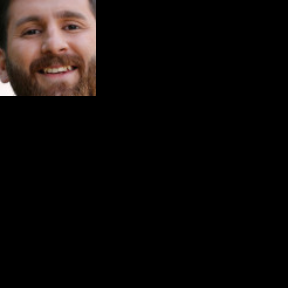

[INFO] faces for face ID: 0


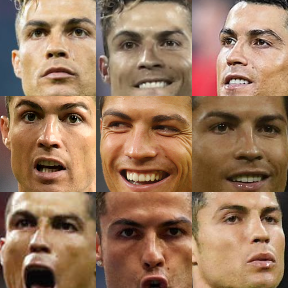

[INFO] faces for face ID: 1


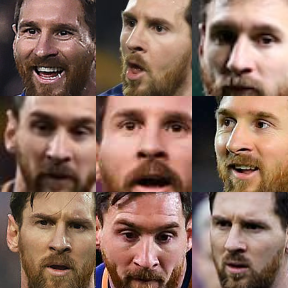

[INFO] faces for face ID: 2


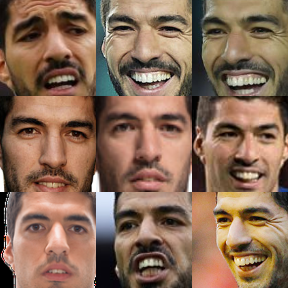

[INFO] faces for face ID: 3


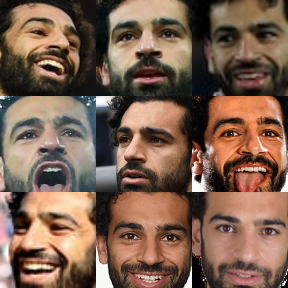

[INFO] faces for face ID: 4


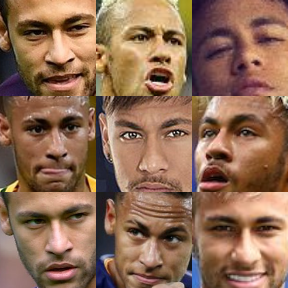

In [ ]:
# loop over the unique face integers
for labelID in labelIDs:
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = np.where(cluster.labels_ == labelID)[0]
  idxs = np.random.choice(idxs, size = min(15, len(idxs)), replace = False)
  faces = []

  for i in idxs:
    current_image = cv2.imread(np_data[i]["imagePath"])
    (top, right, bottom, left) = np_data[i]["loc"]
    current_face = current_image[top:bottom, left:right]
    current_face = cv2.resize(current_face, (96, 96))
    faces.append(current_face)

  montage = build_montages(faces, (96, 96), (3, 3))[0]

  cv2_imshow(montage)